In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
#load and read data 
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Description of Columns
Age: age of primary beneficiary.

Sex: insurance contractor gender-(female, male)

BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Children: Number of children covered by health insurance / Number of dependents

Smoker: Smoking

Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

Charges: Individual medical costs billed by health insurance

In [4]:
#EXPORATPRY DATA ANALYSIS 
df.shape

(1338, 7)

In [5]:
#checking the null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df_numeric = df.select_dtypes(include=[float, int])
df_numeric.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation between Variables ')

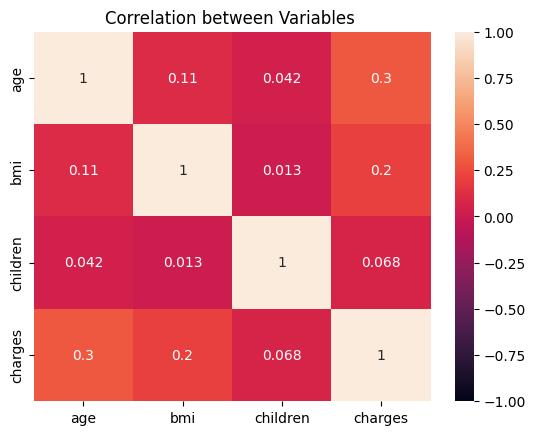

In [11]:
#visualize the corrrelation between features 
heatmap=sns.heatmap(df_numeric.corr(),vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation between Variables ')

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

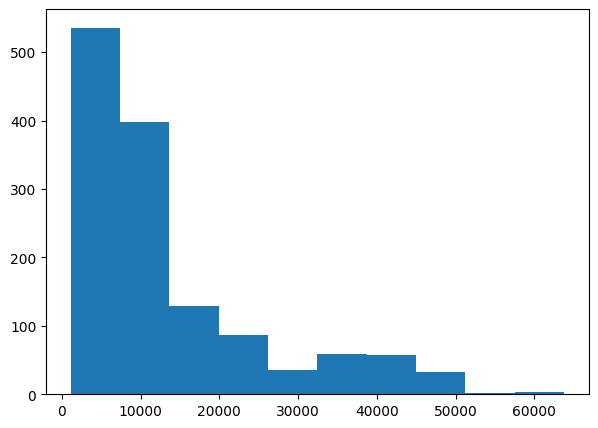

In [12]:
#let's start to analyse the first variable ( charges)
plt.figure(figsize=(7,5))
plt.hist(df.charges)

In [13]:
df['charges'].max()

np.float64(63770.42801)

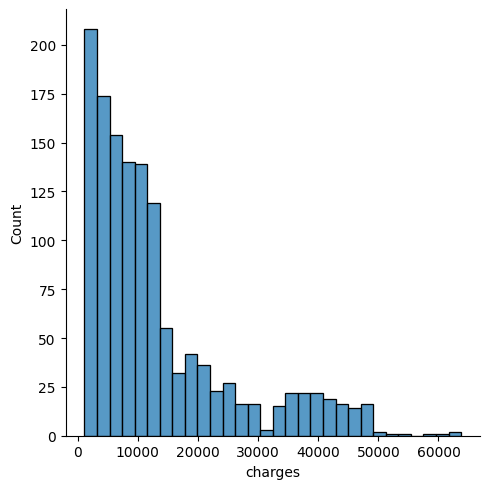

In [15]:
 #another way to vizualise data distribution 
sns.displot(x='charges',data=df)

<Axes: xlabel='charges'>

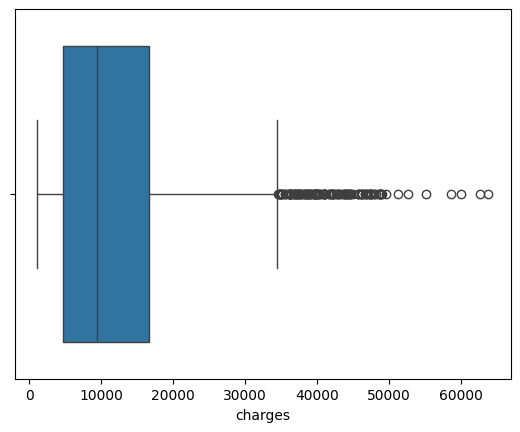

In [21]:
sns.boxplot(x='charges',data=df)

#charges has oitliers values but they are significant 

<Axes: xlabel='bmi'>

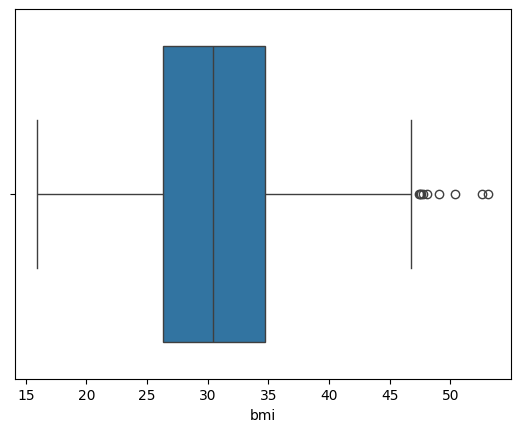

In [22]:
sns.boxplot(x='bmi',data=df)

# As we can see there are oitliers values in bmi , before dealing with other
# We want to make sure if this will effect the correlation with charges

#lomplot will help us vizualize the relaion between bmi and charges 

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

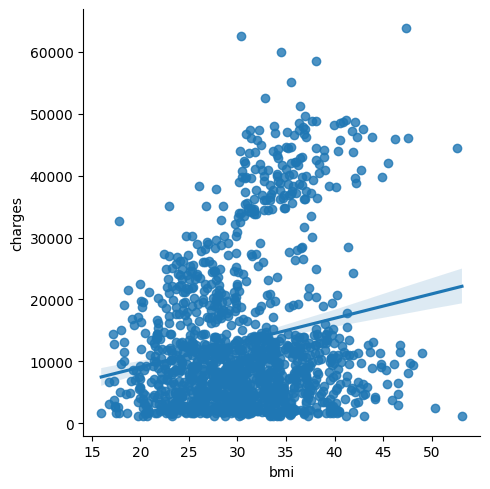

In [24]:
sns.lmplot(x='bmi',y='charges',data=df)
df_numeric = df.select_dtypes(include=[float, int])
df_numeric.corr()['charges']


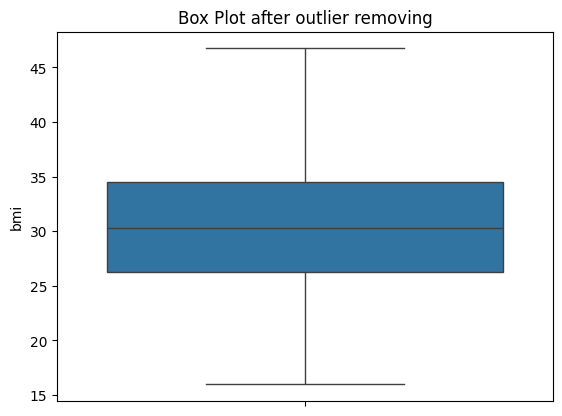

In [26]:
#we will try to drop the outliers in bmi 
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    #df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'bmi')
sns.boxplot(df['bmi'])
plt.title("Box Plot after outlier removing")
plt.show()

#the max of bmi is now 46 
#lets vizualise the correlation after dropping outliers 

age         0.302022
bmi         0.193196
children    0.069739
charges     1.000000
Name: charges, dtype: float64

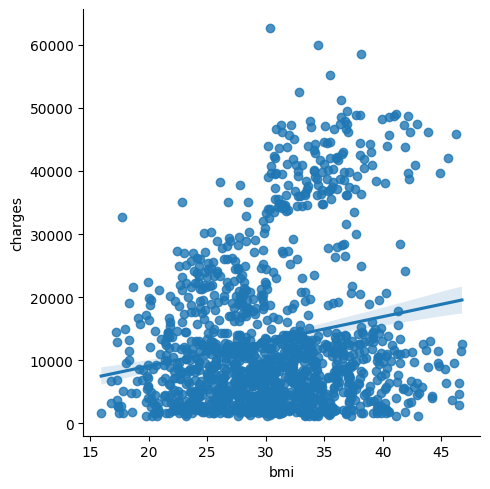

In [28]:

sns.lmplot(x='bmi',y='charges',data=df)
df_numeric = df.select_dtypes(include=[float, int])
df_numeric.corr()['charges']


Dropping Outliers did not effect the correlation wit target variable and that's a good sign

In [29]:
df['age'].describe()

count    1329.000000
mean       39.203913
std        14.047835
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

age has no outliers it's range betweeb 18 and 64 let's try to do some vizualisation

C:\Users\SHUBH\AppData\Local\Temp\ipykernel_17848\2496232954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['age'],kde=True)


<Axes: ylabel='Density'>

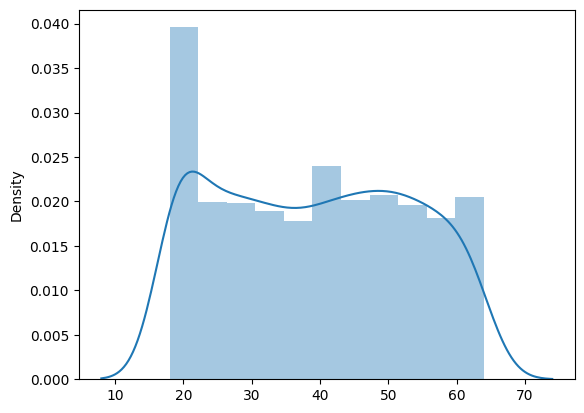

In [31]:
sns.distplot(x=df['age'],kde=True)

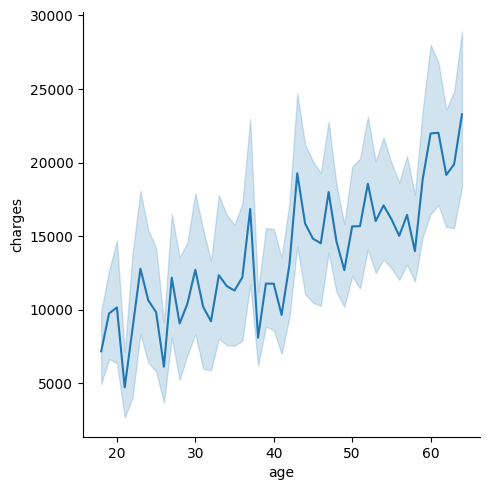

In [32]:
sns.relplot(data=df, x="age", y="charges", kind="line")

We can conclude from the grap above as people age increase the medical charges increases

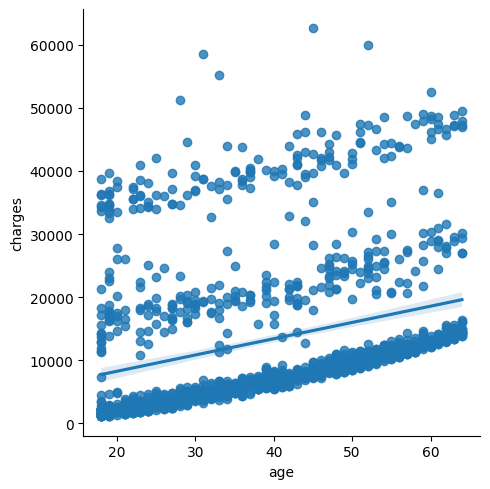

In [34]:
sns.lmplot(x='age',y='charges',data=df)


Age is not well related with charges

#let's analyse childen variable 

<Axes: xlabel='children', ylabel='bmi'>

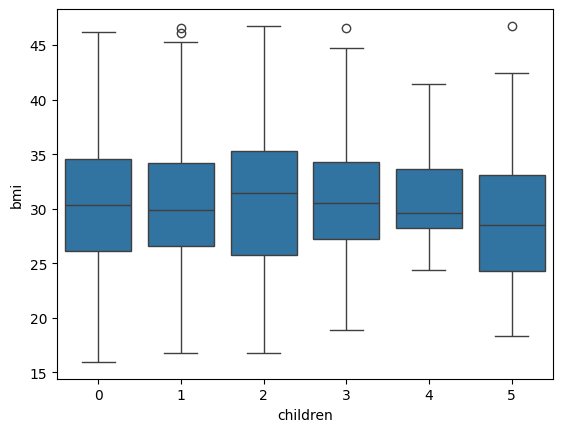

In [35]:
#most pf the client in data have one or zero children 
sns.boxplot(x='children',y='bmi',data=df)

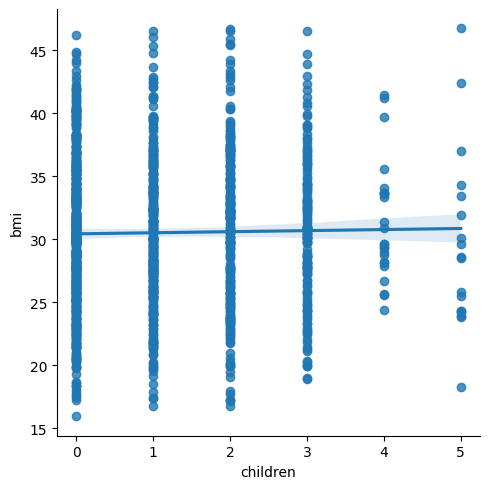

In [36]:
sns.lmplot(x='children',y='bmi',data=df)

<Axes: xlabel='smoker', ylabel='count'>

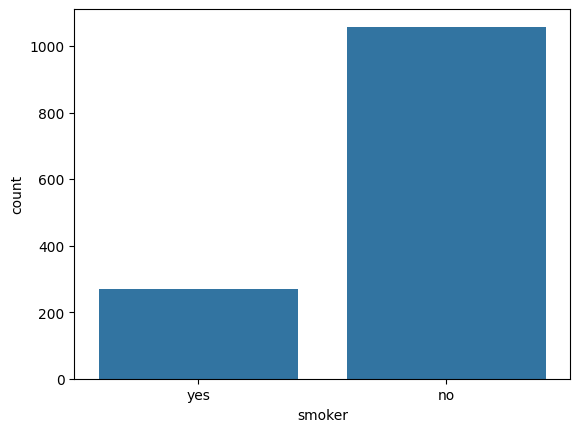

In [37]:
#now let's analyse the variable smoke 
sns.countplot(x='smoker',data=df)

#the are less smokers and now let's try to see if smoker has a relation between bmi and age

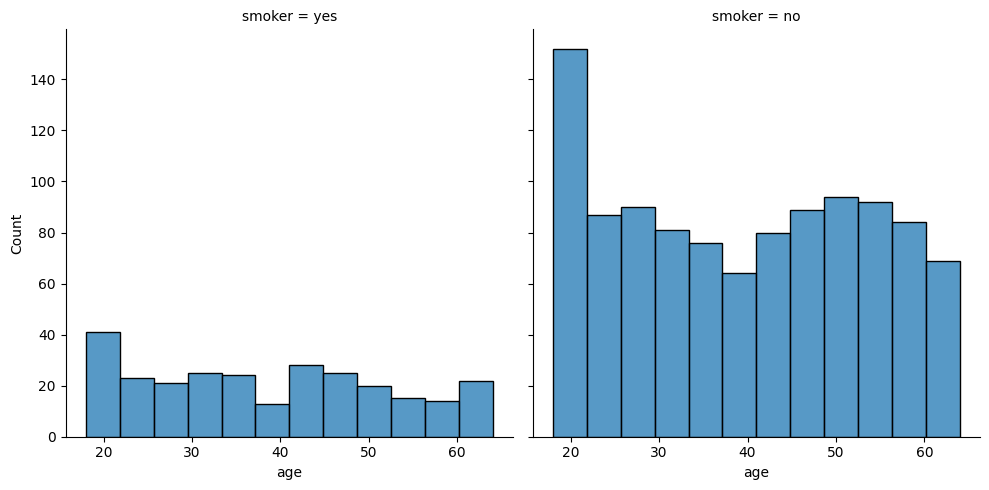

In [38]:
sns.displot(x='age',data=df,col='smoker')

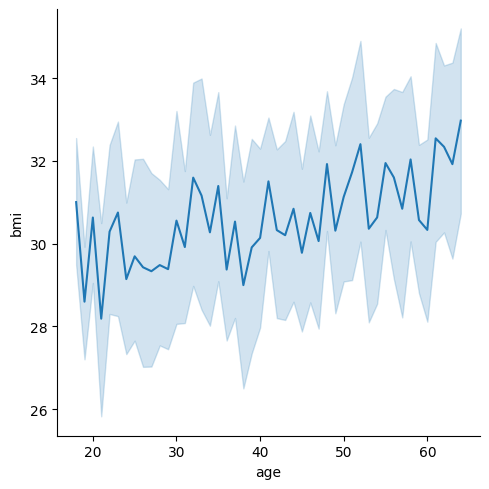

In [39]:
sns.relplot(data=df, x="age", y="bmi", kind="line")

 we can coclude that no somkers are mostly betweeen 20 and 30 years old and there bmi is quite good and also more person gets old the higher his bmi it becomes less healthy

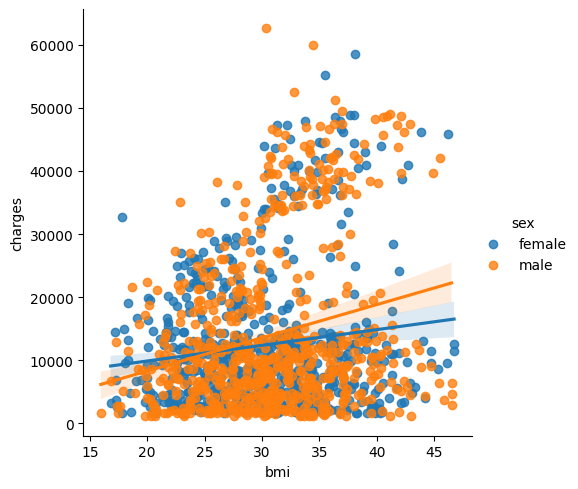

In [40]:
sns.lmplot(x='bmi',y='charges',data=df,hue='sex')

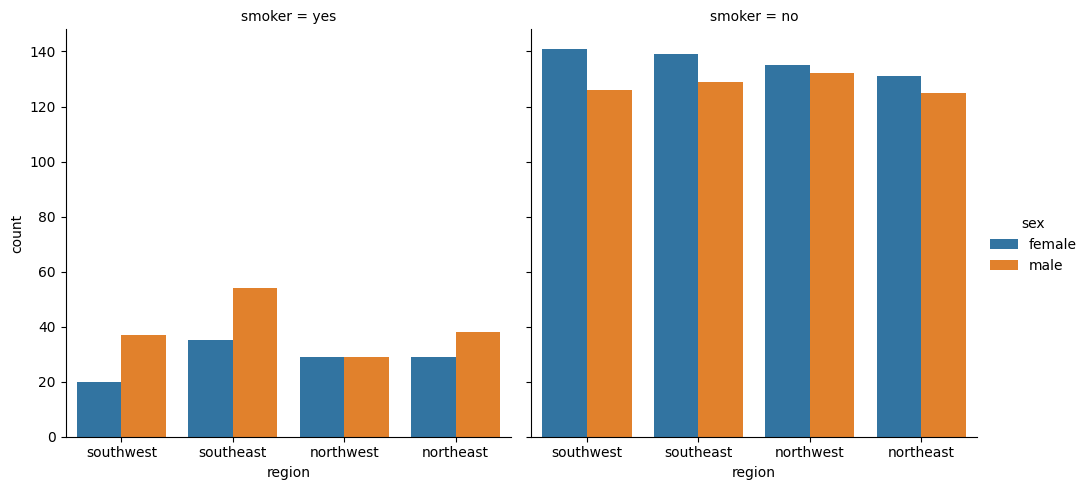

In [41]:
sns.catplot(x='region',hue='sex',col='smoker',data=df,kind='count')

In [42]:
#most smokers are males and they are from souteast 
#most none somkers are females 